In [1]:
import json
import gzip
import tarfile
import numpy as np
import datetime, time
import pytz
import pickle
from matplotlib import pyplot as plt

In [2]:
load_data = True

if not load_data:
    
    tar = tarfile.open("data/tweet_data.tar.gz", "r:gz")
    
    avgFollowers = {}
    tweetTimes = {}
    avgRetweets = {}

    pst_tz = pytz.timezone('US/Pacific')
    
    for member in tar.getmembers():
        f = tar.extractfile(member)
        followerData = []
        timeData = []
        retweetData = []
        for line in f.readlines():
            entry = json.loads(line)
            #Follower Data
            followerData.append(entry['author']['followers'])
            #Tweet time Data
            citation = entry['citation_date']
            timeData.append(datetime.datetime.fromtimestamp(citation, pst_tz))
            #Retweet Data
            retweetData.append(entry['metrics']['citations']['total'])
        
        avgFollowers[member.name] = (sum(followerData) / len (followerData))
        avgRetweets[member.name] =  (sum(retweetData) / len(retweetData))
        tweetTimes[member.name] = timeData
        
        f.close()
    
    tar.close()
    
    with open('data/train/part1/part_1_1_data.pkl' , 'wb') as file:
        pickle.dump([avgFollowers, tweetTimes, avgRetweets] , file)
    
else:
    with open('data/train/part1/part_1_1_data.pkl' , 'rb') as file:
        [avgFollowers, tweetTimes, avgRetweets] = pickle.load(file)
    

In [3]:
def getHourlyTweets(tweetTimes):
    hourlyTweetCount = {}
    
    for i in range(14,32):
        for j in range(0,24):
            hourlyTweetCount[str(i) + ' '+ str(j)] = 0
    
    for i in range(1,8):
        for j in range(0,24):
            hourlyTweetCount[str(i) + ' '+ str(j)] = 0
    
    for tweet in tweetTimes:
        day = tweet.day
        hour = tweet.hour
        currentCount = hourlyTweetCount[str(day) + ' ' + str(hour)]
        hourlyTweetCount[str(day) + ' ' + str(hour)] = currentCount + 1
        
    return hourlyTweetCount

In [4]:
for key in avgFollowers.keys():
    print('The avg followers of the users tweeting with %s are %f'% (key[7:-4], avgFollowers[key]))

The avg followers of the users tweeting with #superbowl are 8858.974663
The avg followers of the users tweeting with #sb49 are 10267.316849
The avg followers of the users tweeting with #patriots are 3309.978828
The avg followers of the users tweeting with #gopatriots are 1401.895509
The avg followers of the users tweeting with #gohawks are 2203.931767
The avg followers of the users tweeting with #nfl are 4653.252286


In [5]:
for key in avgRetweets.keys():
    print('The avg retweets of the users tweeting with %s are %f'% (key[7:-4], avgRetweets[key]))

The avg retweets of the users tweeting with #superbowl are 2.388272
The avg retweets of the users tweeting with #sb49 are 2.511149
The avg retweets of the users tweeting with #patriots are 1.782816
The avg retweets of the users tweeting with #gopatriots are 1.400084
The avg retweets of the users tweeting with #gohawks are 2.014617
The avg retweets of the users tweeting with #nfl are 1.538533


In [6]:
for key in tweetTimes.keys():
    hourlyTweetCounts = getHourlyTweets(tweetTimes[key])
    avgTweetsHourly = sum(hourlyTweetCounts.values()) / len(hourlyTweetCounts.values())
    print('The avg tweets per hour with the hashtag %s are %f'% (key[7:-4], avgTweetsHourly))


The avg tweets per hour with the hashtag #superbowl are 2247.945000
The avg tweets per hour with the hashtag #sb49 are 1378.251667
The avg tweets per hour with the hashtag #patriots are 816.188333
The avg tweets per hour with the hashtag #gopatriots are 43.720000
The avg tweets per hour with the hashtag #gohawks are 313.560000
The avg tweets per hour with the hashtag #nfl are 431.706667


In [12]:
def plotHourlyTweets(tweetTimes):
    x = []
    y = []
    for i in range(14,32):
        for j in range(0,24):
            key = str(i)+ ' '+ str(j)
            #x.append(str(j) + ':00 - ' + str(j+1)+ ':00')
            y.append(tweetTimes[key])
        #plt.figure(figsize=(35,15))
        #binwidth = 0.7
        #plt.bar(xx , y, width = binwidth)
        #plt.xticks(xx, x)
        #plt.xlabel('Day and Time')
        #plt.ylabel('Tweet count')
        #plt.title('Hourly Tweets for %s' % ('01/' + str(i)))
        #plt.show()
        
    for i in range(1,8):
        for j in range(0,24):
            key = str(i)+ ' '+ str(j)
            #xx = np.arange(0,24)
            #x.append(str(j) + ':00 - ' + str(j+1)+ ':00')
            y.append(tweetTimes[key])
    
    plt.figure(figsize=(30,60))
    binwidth = 0.7
    x = np.arange(600)
    plt.bar(x , y, width = binwidth)
    #plt.xticks(xx, x)
    plt.xlabel('Hourly tweet count for all days')
    plt.ylabel('Tweet count')
    plt.title('Hourly Tweets for all days between 01/14 - 02.07')
    plt.show()

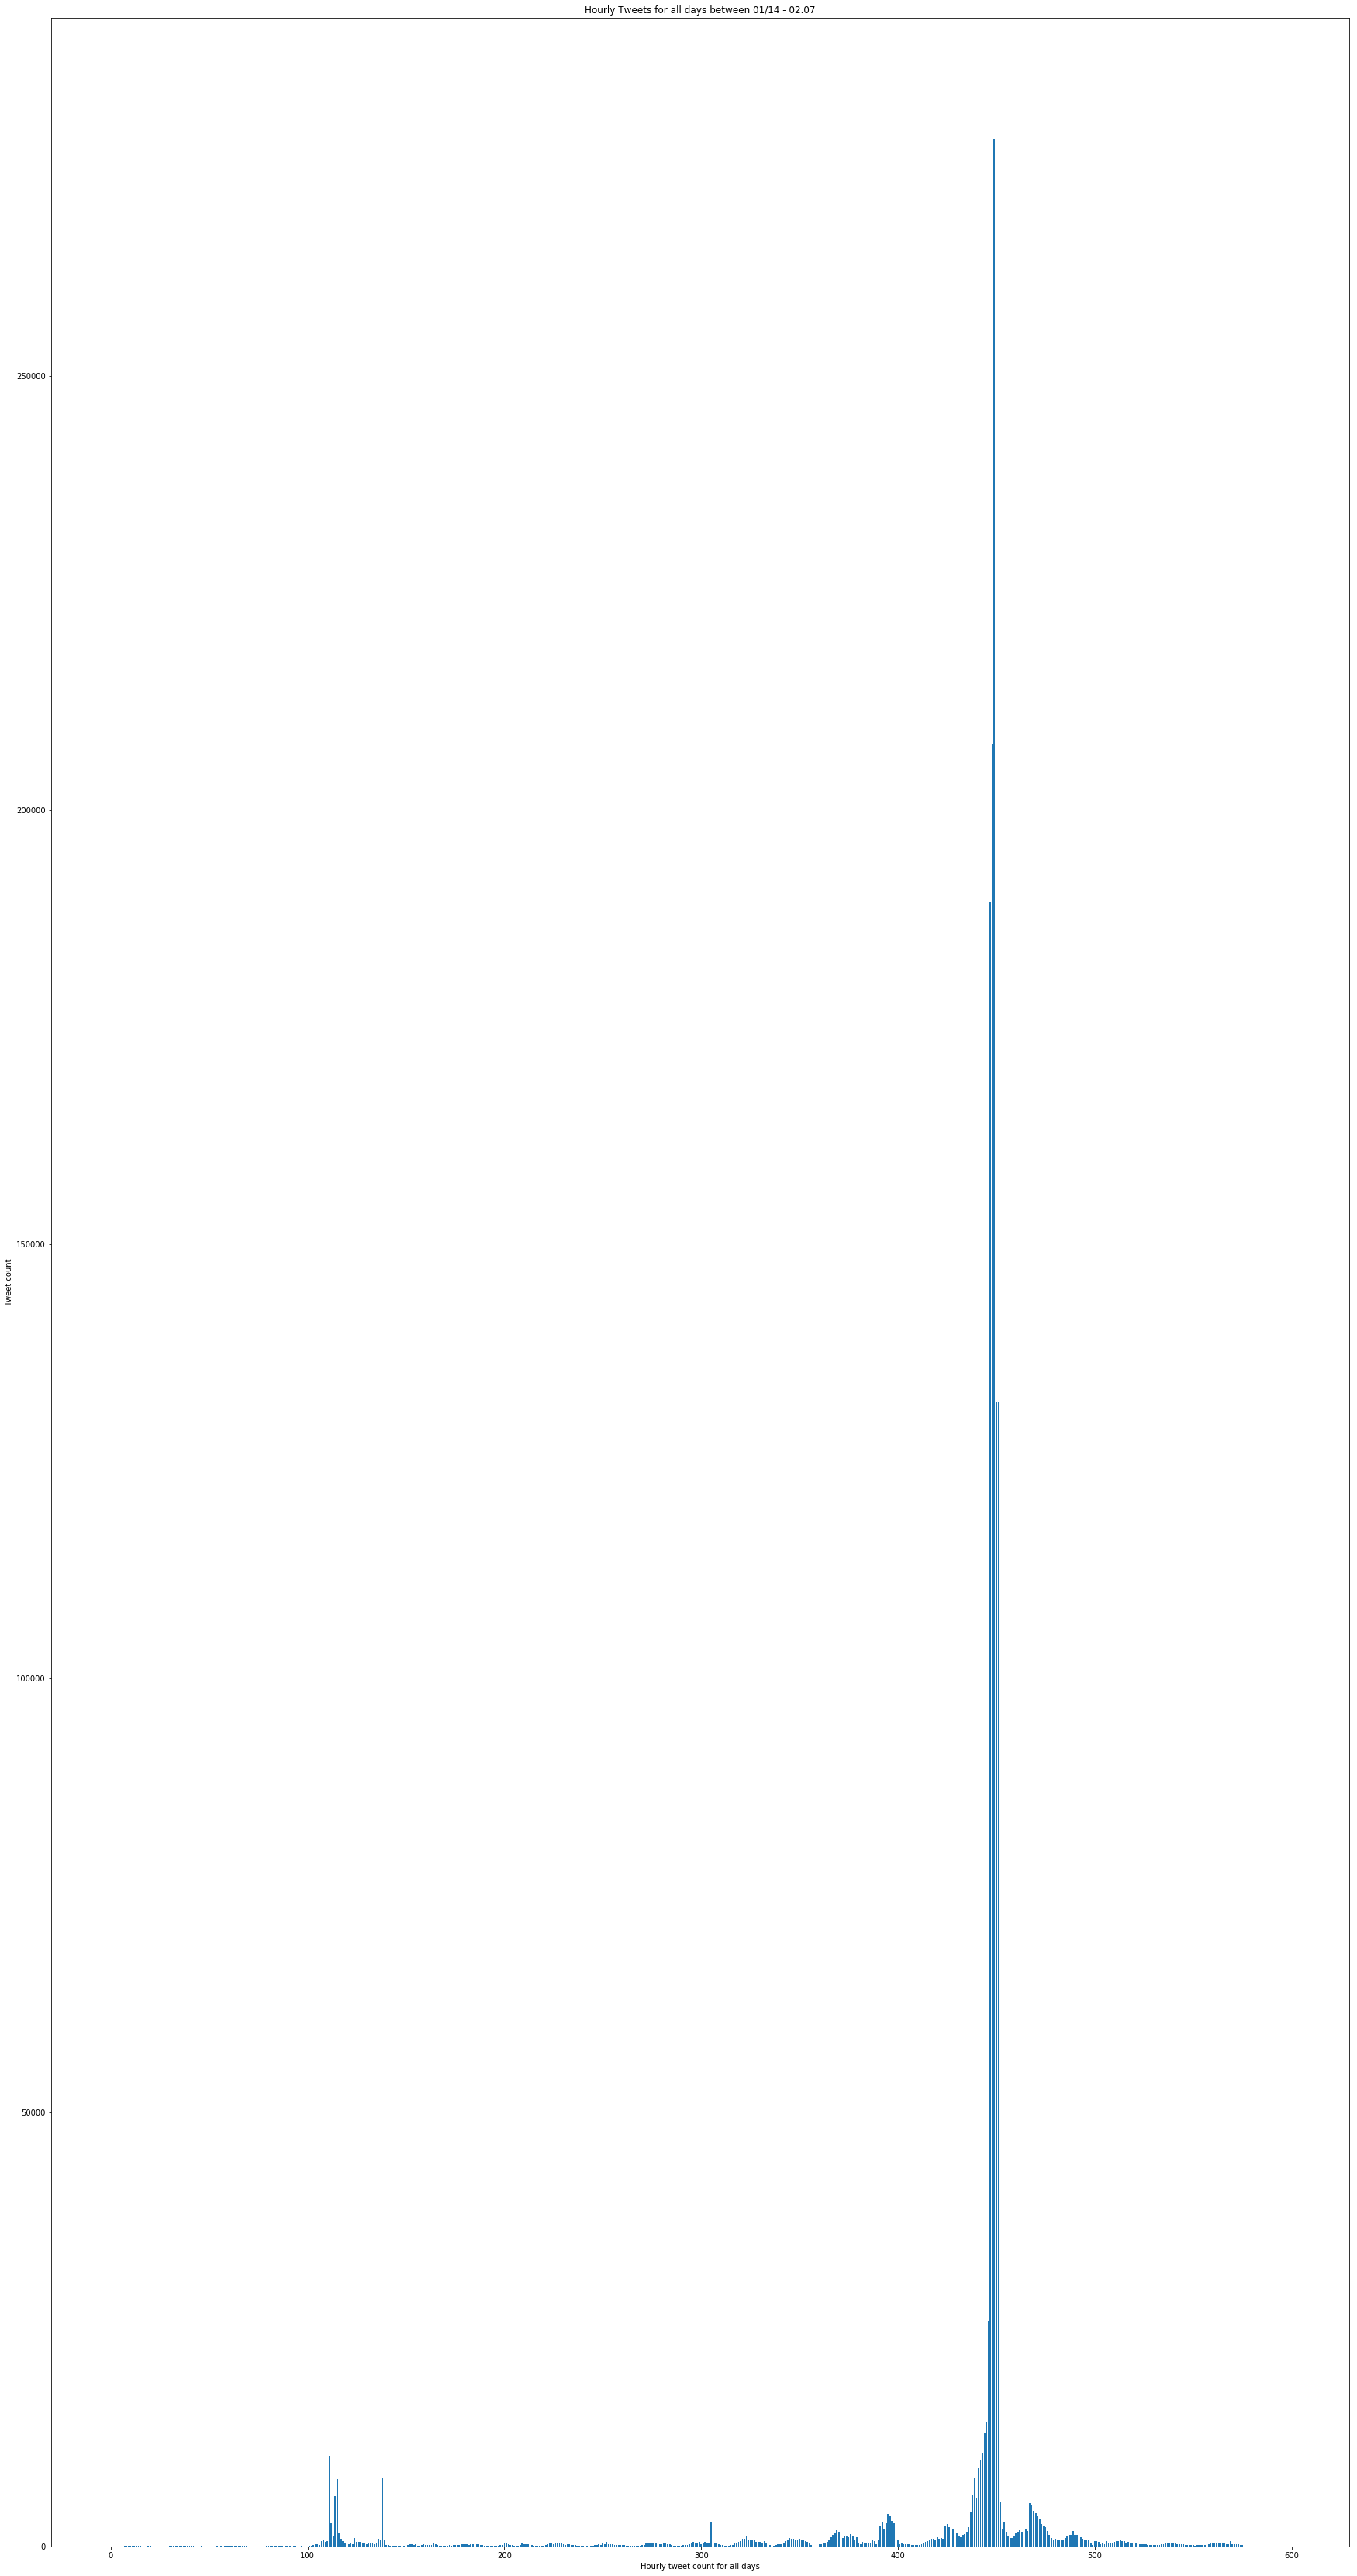

In [13]:
plotHourlyTweets(getHourlyTweets(tweetTimes['tweets_#superbowl.txt']))